# Audio Generation Notebook

Makes classical music!

MAKE SURE TO USE GPU

In [ ]:
!pip install music21

In [ ]:
from music21 import *

## Reading in the Files

In [ ]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='schubert/'
path2='bach/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]
bach_files=[i for i in os.listdir(path2) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])
bach_array = np.array([read_midi(path2+i) for i in bach_files])
notes_array = np.hstack((notes_array, bach_array))

Loading Music File: schubert/schubert_D850_2.mid
Loading Music File: schubert/schuim-2.mid
Loading Music File: schubert/schub_d760_2.mid
Loading Music File: schubert/schumm-4.mid
Loading Music File: schubert/schumm-1.mid
Loading Music File: schubert/schubert_D935_1.mid
Loading Music File: schubert/schuim-1.mid
Loading Music File: schubert/schub_d960_1.mid
Loading Music File: schubert/schuim-4.mid
Loading Music File: schubert/schub_d760_1.mid
Loading Music File: schubert/schubert_D935_2.mid
Loading Music File: schubert/schub_d960_4.mid
Loading Music File: schubert/schu_143_1.mid
Loading Music File: schubert/schub_d960_3.mid
Loading Music File: schubert/schuim-3.mid
Loading Music File: schubert/schubert_D850_3.mid
Loading Music File: schubert/schub_d760_3.mid
Loading Music File: schubert/schubert_D850_1.mid
Loading Music File: schubert/schub_d760_4.mid
Loading Music File: schubert/schu_143_3.mid
Loading Music File: schubert/schumm-6.mid
Loading Music File: schubert/schubert_D935_3.mid
Lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


Loading Music File: bach/BACH.JohannSebastian.TOCC_911.mid
Loading Music File: bach/BACH.JohannSebastian.TOCC_910.mid
Loading Music File: bach/BACH.JohannSebastian.TOCC_916.mid
Loading Music File: bach/BACH.JohannSebastian.TOCARFUG.mid
Loading Music File: bach/BACH.JohannSebastian.ItalianConcerto.A.mid
Loading Music File: bach/BACH.JohannSebastian.PASCFUG.mid
Loading Music File: bach/BACH.JohannSebastian.TOCC_914.mid
Loading Music File: bach/BACH.JohannSebastian.TOCC_913.mid
Loading Music File: bach/BACH.JohannSebastian.ItalianConcerto.C.mid
Loading Music File: bach/BACH.JohannSebastian.TOCC_915.mid
Loading Music File: bach/BACH.JohannSebastian.ItalianConcerto.B.mid


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
len(notes_array)

41

## Understanding the Data

In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

326


(array([222.,  48.,  14.,   9.,   3.,   8.,   6.,   9.,   4.,   3.]),
 array([1.0000e+00, 2.3030e+02, 4.5960e+02, 6.8890e+02, 9.1820e+02,
        1.1475e+03, 1.3768e+03, 1.6061e+03, 1.8354e+03, 2.0647e+03,
        2.2940e+03]),
 <a list of 10 Patch objects>)

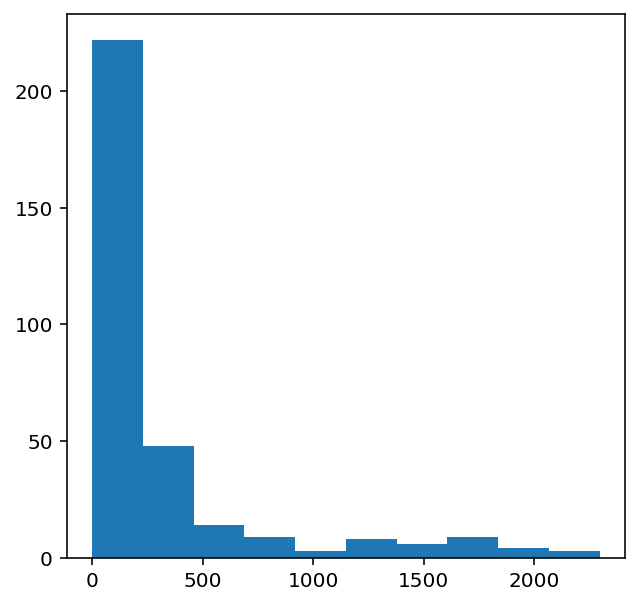

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
# Ignore the Low Frequency Notes

frequent_notes = [note_ for note_, count in freq.items() if count>=50] # ORIGINALLY count >= 50
print(len(frequent_notes))


171


In [ ]:
# Preparing new musical files that contian only the top frequent notes

new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


## Preparing the Data

In [ ]:
len(new_music[1])

2646

In [ ]:
no_of_timesteps = 400 # HOW MANY PREVIOUS NOTES TO ANALYZE TO MAKE NEW NOTE
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [ ]:
print("x shape", x.shape)
print("y shape", y.shape)

x shape (76773, 400)
y shape (76773,)


In [ ]:
# Assign a unique integer to every note:

unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [ ]:
len(x_note_to_int.keys())

171

In [ ]:
# Preparing the integer sequences for input data

x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [ ]:
x_seq.shape

(76773, 400)

In [ ]:
# Do the same for output data

unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
# 80% of dat for training and the rest 20% for evaluation
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

## Building WaveNet Model

In [ ]:
len(unique_x)

171

In [ ]:
# DEFINING WAVENET MODEL
# NOTE: NO RESIDUAL OR SKIP CONNECTIONS

from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=no_of_timesteps,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 100)          17100     
_________________________________________________________________
conv1d (Conv1D)              (None, 400, 64)           19264     
_________________________________________________________________
dropout (Dropout)            (None, 400, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 200, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 128)          24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 128)          0

In [ ]:
# Defining the callback to save the best model during training

mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
# TRAINING THE MODEL
BATCH_SIZE = 128
EPOCHS = 100

history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=BATCH_SIZE,epochs=EPOCHS, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])
# 2 min 38 seconds

Epoch 1/100
480/480 [==============================] - 16s 31ms/step - loss: 4.6377 - val_loss: 4.3561

Epoch 00001: val_loss improved from inf to 4.35605, saving model to best_model.h5
Epoch 2/100
480/480 [==============================] - 14s 29ms/step - loss: 4.2363 - val_loss: 4.2062

Epoch 00002: val_loss improved from 4.35605 to 4.20615, saving model to best_model.h5
Epoch 3/100
480/480 [==============================] - 14s 29ms/step - loss: 4.0708 - val_loss: 4.0709

Epoch 00003: val_loss improved from 4.20615 to 4.07092, saving model to best_model.h5
Epoch 4/100
480/480 [==============================] - 14s 28ms/step - loss: 3.9409 - val_loss: 3.9841

Epoch 00004: val_loss improved from 4.07092 to 3.98411, saving model to best_model.h5
Epoch 5/100
480/480 [==============================] - 14s 29ms/step - loss: 3.8391 - val_loss: 3.9221

Epoch 00005: val_loss improved from 3.98411 to 3.92210, saving model to best_model.h5
Epoch 6/100
480/480 [==============================] -

In [ ]:
# Loading the Best Model:
from keras.models import load_model
model = load_model('best_model.h5')

### Plotting Training Statistics

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


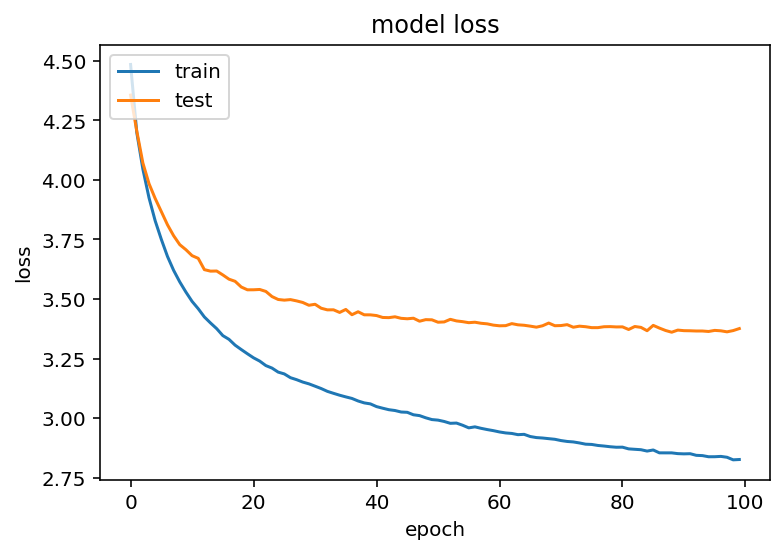

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making our own Music (Inference Phase)

In [ ]:
len(x_val[5])

400

In [ ]:
#Select a random array of sample values as a starting point to our model

import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(800):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[107, 107, 107, 107, 107, 107, 107, 133, 107, 107, 107, 133, 107, 107, 107, 133, 107, 107, 107, 142, 107, 107, 107, 107, 107, 142, 107, 107, 107, 148, 148, 148, 148, 148, 107, 107, 107, 131, 107, 133, 107, 142, 107, 133, 107, 133, 133, 133, 107, 133, 133, 133, 133, 142, 107, 133, 131, 142, 8, 106, 131, 145, 133, 133, 131, 142, 147, 133, 147, 142, 147, 133, 147, 147, 147, 133, 147, 50, 147, 133, 147, 50, 147, 133, 147, 147, 147, 133, 147, 147, 147, 133, 147, 50, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 50, 147, 50, 147, 50, 20, 50, 147, 133, 20, 84, 50, 50, 107, 84, 131, 50, 52, 84, 50, 50, 84, 84, 84, 84, 20, 84, 20, 20, 84, 20, 20, 20, 84, 20, 20, 84, 84, 84, 20, 52, 52, 20, 120, 52, 52, 20, 120, 20, 50, 84, 50, 84, 20, 84, 20, 84, 84, 148, 20, 20, 107, 84, 20, 84, 84, 20, 20, 84, 107, 84, 50, 50, 52, 84, 50, 74, 52, 52, 74, 74, 52, 84, 74, 115, 147, 84, 131, 115, 147, 115, 120, 84, 120, 84, 131, 84, 34, 84, 84, 148, 34, 148, 147, 148, 147, 148, 148, 148, 148, 

In [ ]:
# Convert integers back into notes

x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [ ]:
# Convert back the predictions into a MIDI file.

def convert_to_midi(prediction_output, file_path='music.mid'):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.25
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp=file_path)

In [ ]:
convert_to_midi(predicted_notes, file_path="music11+10x.mid")

# Just found it! - trying to figure out how to play midi files :(

***Parameters that can be tuned:***
- The input sequence: *32 notes*
- Number of songs to add: *10 songs*
- Notes to analyze: *Notes that appear at least 50 times across databse*
- Input Sequence: *Randomly Generated*
- Batch Size: *128*
- Epochs: *50*


TODO:
- Try doing the LSTM-RNN